In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('Global Temperatures.csv')  # Replace with actual file path
print(data.columns)

Index(['dt', 'LandAverageTemperature'], dtype='object')


In [3]:
data.dtypes

dt                         object
LandAverageTemperature    float64
dtype: object

In [4]:
data['dt'] = pd.to_datetime(data['dt'], errors='coerce')
data.head(2)

,dt,LandAverageTemperature
0,1750-01-01,3.034
1,1750-02-01,3.083


In [5]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
data['LandAverageTemperature'] = scaler.fit_transform(data[['LandAverageTemperature']])

In [6]:
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)
sequence_length=12
X, y = create_sequences(data['LandAverageTemperature'].values, sequence_length)

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [8]:
model = Sequential([
    LSTM(50, activation='relu', input_shape=(12, 1), return_sequences=True),
    LSTM(50, activation='relu', return_sequences=False),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')

C:\Users\soura\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
X = X.reshape((X.shape[0], X.shape[1], 1))

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [23]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: nan - val_loss: nan
Epoch 2/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: nan - val_loss: nan
Epoch 3/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: nan - val_loss: nan
Epoch 4/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: nan - val_loss: nan
Epoch 5/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: nan - val_loss: nan
Epoch 6/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: nan - val_loss: nan
Epoch 7/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: nan - val_loss: nan
Epoch 8/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: nan - val_loss: nan
Epoch 9/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: nan - val_loss: nan
Epoch 10/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: nan - val_loss: nan
Epoch 11/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: nan - val_loss: nan
Epoch 12/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: nan - val_loss: nan
Epoch 13/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step 

In [25]:
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step


In [31]:
last_sequence = data['LandAverageTemperature'].values[-12:]  # Last 12 months
future_predictions = []

for _ in range(12):  # Predict next 12 months
    input_seq = last_sequence.reshape((1, 12, 1))
    next_value = model.predict(input_seq)
    future_predictions.append(next_value[0][0])
    last_sequence = np.append(last_sequence[1:], next_value)

# Convert predictions back to original scale
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))
print(future_predictions)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
[[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]


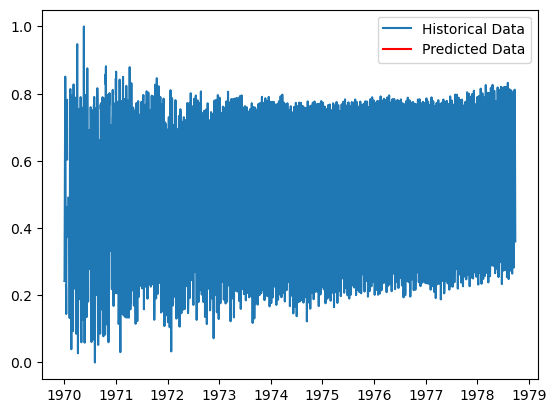

In [37]:
import matplotlib.pyplot as plt
plt.plot(data.index, data['LandAverageTemperature'], label='Historical Data')
future_dates = pd.date_range(start='2015-02-01', periods=12, freq='M')
plt.plot(future_dates, future_predictions, label='Predicted Data', color='red')
plt.legend()
plt.show()